<a href="https://colab.research.google.com/github/manpreethsai/GTD_GOOGLE_COLLAB/blob/master/EDA_GTD_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('GLOBAL_TERRORISM.csv', encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
map_cols = {
'eventid' : 'GTD_ID ',
'iyear' : 'YEAR',
'imonth' : 'MONTH', 
'iday' : 'DAY',
'extended' : 'EXTENDED_INCIDENT',  
'summary' : 'INCIDENT_SUMMARY',
'crit1' : 'INCLUSION_CRITERIA_1',
'crit2' : 'INCLUSION_CRITERIA_2', 
'crit3' : 'INCLUSION_CRITERIA_3',
'multiple' : 'PART_OF_MULTIPLE_INCIDENT',  
'related' : 'RELATED_INCIDENTS',  
'country' : 'COUNTRY_CODE',
'country_txt' : 'COUNTRY_TXT',  
'region' : 'REGION_CODE',
'region_txt' : 'REGION_TXT',  
'city' : 'CITY_NAME',  
'latitude' : 'LATITUDE',  
'longitude' : 'LONGITUDE',  
'specificity' : 'GEOCODING_SPECIFICITY',  
'attacktype1' : 'ATTACK_TYPE_CODE',
'attacktype1_txt' : 'ATTACK_TYPE_TXT',  
'success' : 'SUCCESSFUL_ATTACK', 
'suicide' : 'SUICIDE_ATTACK',  
'weaptype1' : 'WEAPON_TYPE_CODE',
'weaptype1_txt' : 'WEAPON_TYPE_TXT',  
'targtype1' : 'VICTIM_TYPE_CODE',
'targtype1_txt' : 'VICTIM_TYPE_TXT',  
'corp1' : 'NAME_OF_ENTITY',  
'natlty1' : 'NATIONALITY_OF_VICTIM_CODE',
'natlty1_txt' : 'NATIONALITY_OF_VICTIM_TXT',  
'individual' : 'UNAFFLIATED INDIVIDUALS',  
'gname' : 'PREPETRATOR GROUP NAME',  
'nperps' : 'NUMBER OF PREPETRATORS',  
'claimed' : 'CLAIM OF RESPONSIBILTY',  
'motive' : 'MOTIVE',  
'nkill' : 'TOTAL FATALITIES',  
'nkillter' : 'PREPETRATOR FATALITIES',  
'nwound' : 'TOTAL INJURED',  
'nwoundte' : 'PREPETRATORS INJURED',  
'property' : 'PROPERTY DAMAGE',  
'propvalue' : 'VALUE OF PROPERTY DAMAGE in usd',  
'nhostkid' : 'TOTAL NO. OF HOSTAGES / VICTIM KIDNAPS',  
'ransomamt' : 'TOTAL RANSOM AMOUNT DEMANDED',  
'ransompaid' : 'TOTAL RANSOM AMOUNT PAID',  
'INT_IDEO' : 'INTERNATIONAL_IDELOGICAL', 
'doubtterr' : 'DOUBT TERRORISM PROPER',
'alternative_txt' : 'ALTERNATIVE CRIME'
}

    


In [ ]:
df_cut = df[map_cols.keys()]
df_cut.head()

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,multiple,related,country,country_txt,region,region_txt,city,latitude,longitude,specificity,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,individual,gname,nperps,claimed,motive,nkill,nkillter,nwound,nwoundte,property,propvalue,nhostkid,ransomamt,ransompaid,INT_IDEO,doubtterr,alternative_txt
0,197000000001,1970,7,2,0,NaN,1,1,1,0.0,NaN,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1.0,1,Assassination,1,0,13.0,Unknown,14,Private Citizens & Property,NaN,58.0,Dominican Republic,0.0,MANO-D,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,197000000002,1970,0,0,0,NaN,1,1,1,0.0,NaN,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,1.0,6,Hostage Taking (Kidnapping),1,0,13.0,Unknown,7,Government (Diplomatic),Belgian Ambassador Daughter,21.0,Belgium,0.0,23rd of September Communist League,7.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,800000.0,NaN,1.0,0.0,NaN
2,197001000001,1970,1,0,0,NaN,1,1,1,0.0,NaN,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,4.0,1,Assassination,1,0,13.0,Unknown,10,Journalists & Media,Voice of America,217.0,United States,0.0,Unknown,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,-9.0,0.0,NaN
3,197001000002,1970,1,0,0,NaN,1,1,1,0.0,NaN,78,Greece,8,Western Europe,Athens,37.997490,23.762728,1.0,3,Bombing/Explosion,1,0,6.0,Explosives,7,Government (Diplomatic),NaN,217.0,United States,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-9.0,0.0,NaN
4,197001000003,1970,1,0,0,NaN,1,1,1,0.0,NaN,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,1.0,7,Facility/Infrastructure Attack,1,0,8.0,Incendiary,7,Government (Diplomatic),NaN,217.0,United States,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-9.0,-9.0,NaN


In [ ]:
df_cut.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133359 entries, 0 to 133358
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          133359 non-null  int64  
 1   iyear            133359 non-null  int64  
 2   imonth           133359 non-null  int64  
 3   iday             133359 non-null  int64  
 4   extended         133359 non-null  int64  
 5   summary          67230 non-null   object 
 6   crit1            133359 non-null  int64  
 7   crit2            133359 non-null  int64  
 8   crit3            133359 non-null  int64  
 9   multiple         133358 non-null  float64
 10  related          16403 non-null   object 
 11  country          133359 non-null  int64  
 12  country_txt      133359 non-null  object 
 13  region           133359 non-null  int64  
 14  region_txt       133359 non-null  object 
 15  city             132925 non-null  object 
 16  latitude         129078 non-null  floa

In [ ]:
td = df_cut.copy(deep=True)

In [ ]:
td['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                   14889
The specific motive for the attack is unknown.                                                                                                                                                                                                            14430
The specific motive for the attack is unknown..                                                                                                                                                                                                             148
The specific motive for the attack is unknown or was not reported.                                                                                                                                                                      

In [ ]:
td.drop(columns=['summary', 'motive', 'corp1'], inplace=True)
td.head()

,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,multiple,related,country,country_txt,region,region_txt,city,latitude,longitude,specificity,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,gname,nperps,claimed,nkill,nkillter,nwound,nwoundte,property,propvalue,nhostkid,ransomamt,ransompaid,INT_IDEO,doubtterr,alternative_txt
0,197000000001,1970,7,2,0,1,1,1,0.0,NaN,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1.0,1,Assassination,1,0,13.0,Unknown,14,Private Citizens & Property,58.0,Dominican Republic,0.0,MANO-D,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,197000000002,1970,0,0,0,1,1,1,0.0,NaN,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,1.0,6,Hostage Taking (Kidnapping),1,0,13.0,Unknown,7,Government (Diplomatic),21.0,Belgium,0.0,23rd of September Communist League,7.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,800000.0,NaN,1.0,0.0,NaN
2,197001000001,1970,1,0,0,1,1,1,0.0,NaN,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,4.0,1,Assassination,1,0,13.0,Unknown,10,Journalists & Media,217.0,United States,0.0,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,-9.0,0.0,NaN
3,197001000002,1970,1,0,0,1,1,1,0.0,NaN,78,Greece,8,Western Europe,Athens,37.997490,23.762728,1.0,3,Bombing/Explosion,1,0,6.0,Explosives,7,Government (Diplomatic),217.0,United States,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-9.0,0.0,NaN
4,197001000003,1970,1,0,0,1,1,1,0.0,NaN,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,1.0,7,Facility/Infrastructure Attack,1,0,8.0,Incendiary,7,Government (Diplomatic),217.0,United States,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-9.0,-9.0,NaN


In [ ]:
td.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'crit1', 'crit2',
       'crit3', 'multiple', 'related', 'country', 'country_txt', 'region',
       'region_txt', 'city', 'latitude', 'longitude', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt',
       'individual', 'gname', 'nperps', 'claimed', 'nkill', 'nkillter',
       'nwound', 'nwoundte', 'property', 'propvalue', 'nhostkid', 'ransomamt',
       'ransompaid', 'INT_IDEO', 'doubtterr', 'alternative_txt'],
      dtype='object')

In [ ]:
cat_cols = ['extended', 'crit1', 'crit2', 'crit3', 'multiple', 'country', 'country_txt', 'region',
       'region_txt', 'city', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'targtype1', 'targtype1_txt', 'natlty1',
       'natlty1_txt', 'individual', 'gname', 'claimed', 'property', 'INT_IDEO', 'doubtterr', 'alternative_txt' ]

In [ ]:
for each in cat_cols:
    td[each] = td[each].astype('category')

In [ ]:
td.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133359 entries, 0 to 133358
Data columns (total 44 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   eventid          133359 non-null  int64   
 1   iyear            133359 non-null  int64   
 2   imonth           133359 non-null  int64   
 3   iday             133359 non-null  int64   
 4   extended         133359 non-null  category
 5   crit1            133359 non-null  category
 6   crit2            133359 non-null  category
 7   crit3            133359 non-null  category
 8   multiple         133358 non-null  category
 9   related          16403 non-null   object  
 10  country          133359 non-null  category
 11  country_txt      133359 non-null  category
 12  region           133359 non-null  category
 13  region_txt       133359 non-null  category
 14  city             132925 non-null  category
 15  latitude         129078 non-null  float64 
 16  longitude        129

In [ ]:
mask1 = td['country_txt'] == 'India'
ind = td[mask1].copy(deep=True)
ind.head()

,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,multiple,related,country,country_txt,region,region_txt,city,latitude,longitude,specificity,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,gname,nperps,claimed,nkill,nkillter,nwound,nwoundte,property,propvalue,nhostkid,ransomamt,ransompaid,INT_IDEO,doubtterr,alternative_txt
1186,197202220004,1972,2,22,0,1,1,1,0.0,NaN,92,India,6,South Asia,New Delhi,28.585836,77.153336,1.0,4,Hijacking,1,0,6.0,Explosives,6,Airports & Aircraft,75.0,Germany,0.0,Palestinians,5.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,187.0,5000000.0,NaN,1.0,0.0,NaN
2764,197501190004,1975,1,2,0,1,1,1,0.0,NaN,92,India,6,South Asia,Samastipur,25.863042,85.781004,1.0,3,Bombing/Explosion,1,0,6.0,Explosives,2,Government (General),92.0,India,0.0,Ananda Marga,-99.0,0.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3857,197605260001,1976,5,26,0,1,1,1,0.0,NaN,92,India,6,South Asia,New Delhi,28.585836,77.153336,1.0,3,Bombing/Explosion,1,0,6.0,Explosives,6,Airports & Aircraft,92.0,India,0.0,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,-9.0,0.0,NaN
5327,197709280004,1977,9,28,0,1,1,1,0.0,NaN,92,India,6,South Asia,Bombay,19.075984,72.877656,1.0,4,Hijacking,1,0,5.0,Firearms,6,Airports & Aircraft,101.0,Japan,0.0,Japanese Red Army (JRA),5.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,146.0,6000000.0,NaN,1.0,0.0,NaN
7337,197901130004,1979,1,13,0,1,1,1,0.0,NaN,92,India,6,South Asia,Unknown,26.200605,92.937574,4.0,2,Armed Assault,1,0,5.0,Firearms,3,Police,92.0,India,0.0,Naga People,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,-9.0,NaN


In [ ]:
ind['related'] = ind['related'].astype('category')
ind['related']

1186      NaN
2764      NaN
3857      NaN
5327      NaN
7337      NaN
         ... 
133334    NaN
133335    NaN
133342    NaN
133343    NaN
133353    NaN
Name: related, Length: 8672, dtype: category
Categories (882, object): [198310130002, 198310130003, 198404150005, 198404150006, 198404150007, 1984...,
                           198703030001, 198703030002, 198703030002, 198703030001, ...,
                           201405100061, 201405100062, 201405120064, 201405120065,
                           201405260212, 201405260218, 201405280063, 201405280064]

In [ ]:
ind['doubtterr'].values
ind['doubtterr'] = ind['doubtterr'].astype('float')
ind['doubtterr'].replace(-9, np.nan)

1186      0.0
2764      0.0
3857      0.0
5327      0.0
7337      NaN
         ... 
133334    1.0
133335    1.0
133342    0.0
133343    0.0
133353    0.0
Name: doubtterr, Length: 8672, dtype: float64

In [ ]:
ind['doubtterr'] = ind['doubtterr'].astype('bool')
ind['doubtterr'].value_counts()


False    6900
True     1772
Name: doubtterr, dtype: int64

In [ ]:
import sweetviz as sv
my_report = sv.analyze(ind, target_feat = 'doubtterr', pairwise_analysis = 'on')


TypeError: ignored

In [ ]:
my_report.show_html(filepath='SWEETVIZ_REPORT_BOOL.html')

Report SWEETVIZ_REPORT_BOOL.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
!pip install sweetviz

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
Shape of your Data Set: (181691, 135)
Classifying variables in data set...
    134 Predictors classified...
        This does not include the Target column(s)
    81 variables removed since they were ID or low-information variables
    List of variables removed: ['eventid', 'approxdate', 'resolution', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2',

:TARGET::                          |▍                 | [  2%]   25:38  -> (18:48:23 left)


Could not draw Time Series plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 343.750


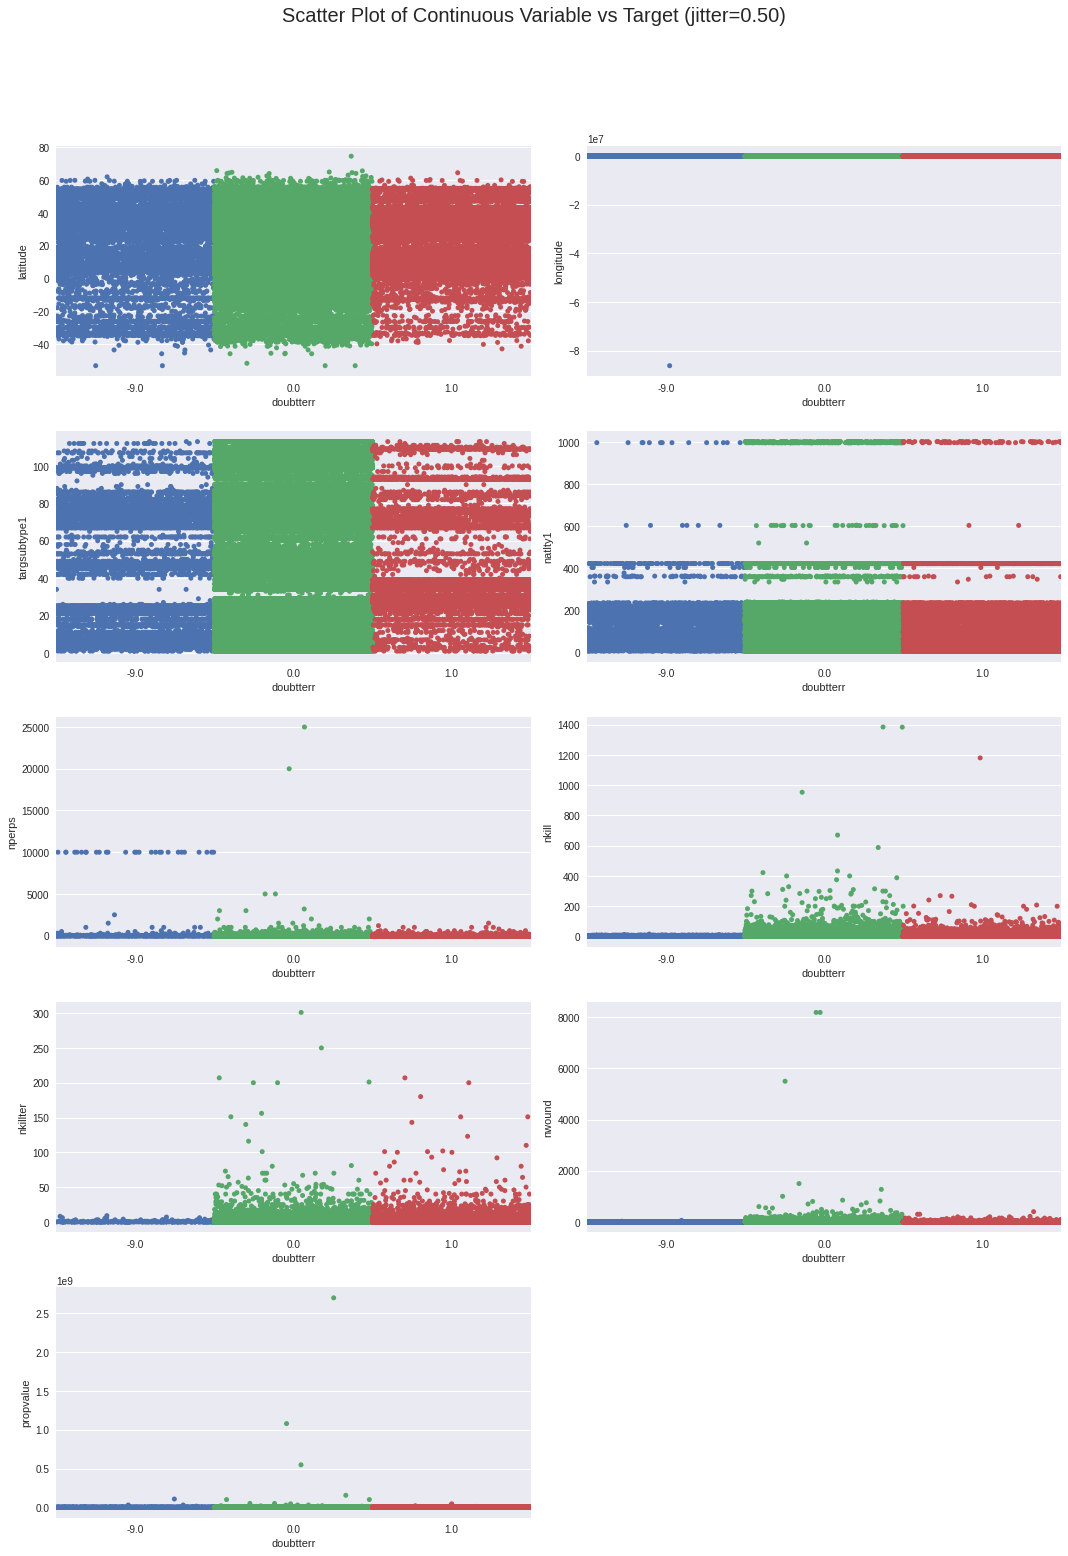

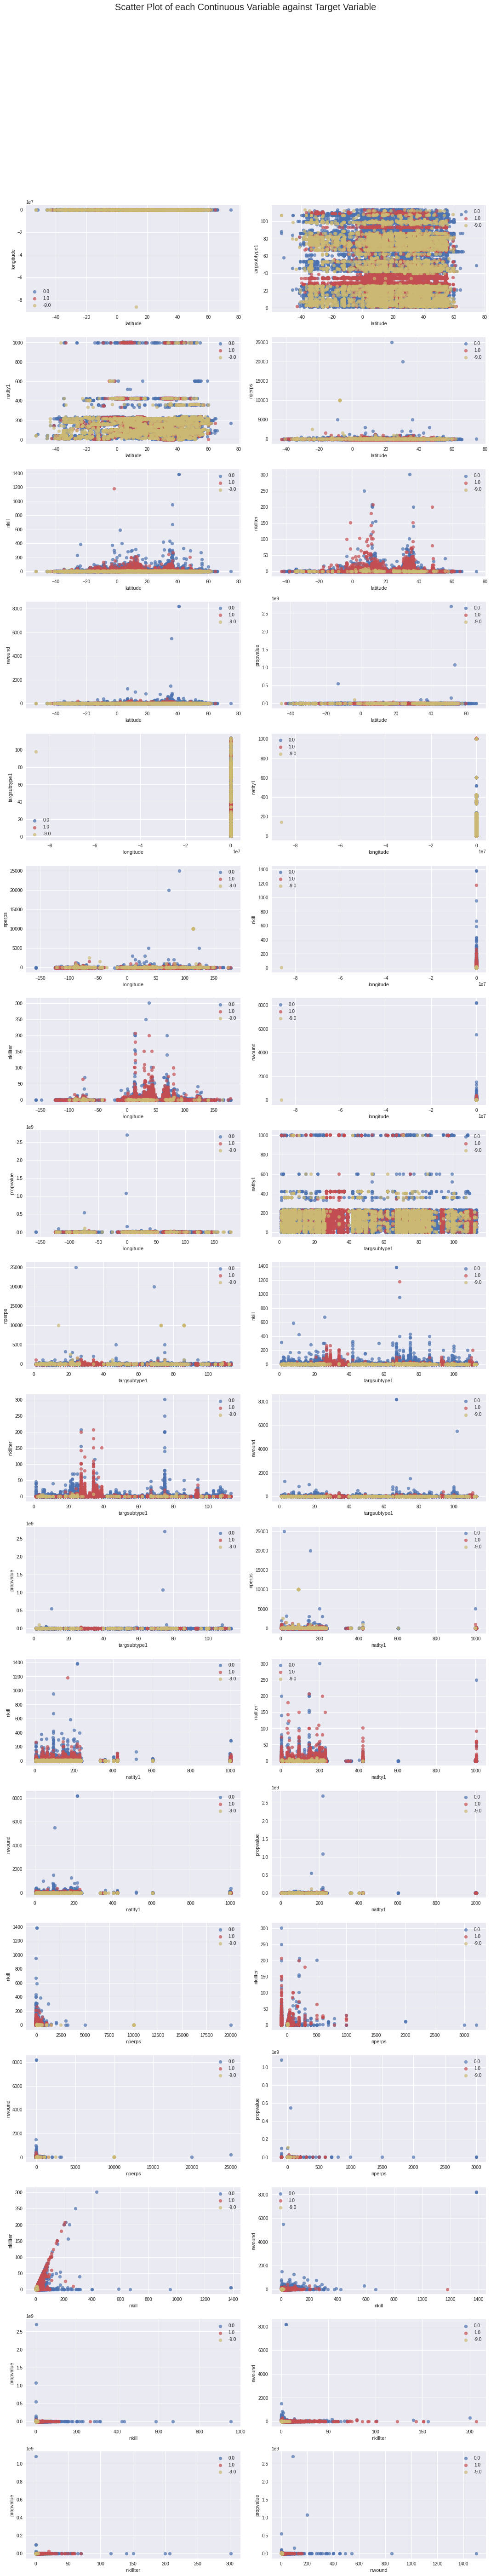

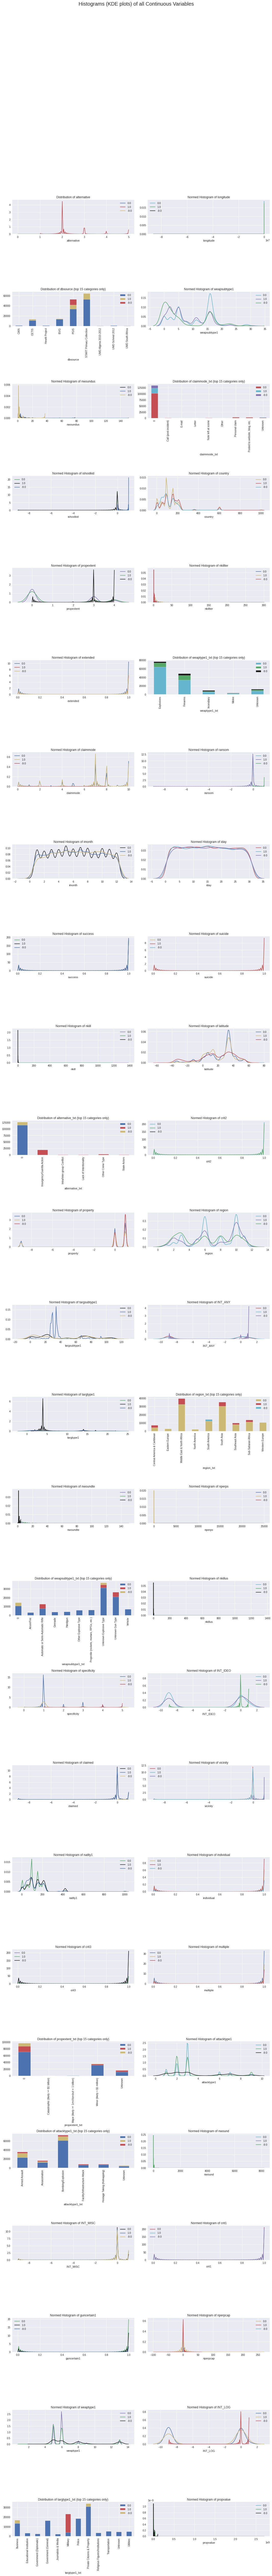

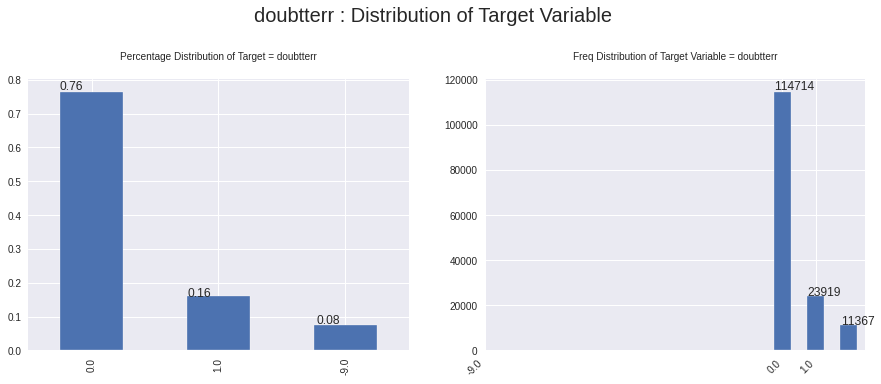

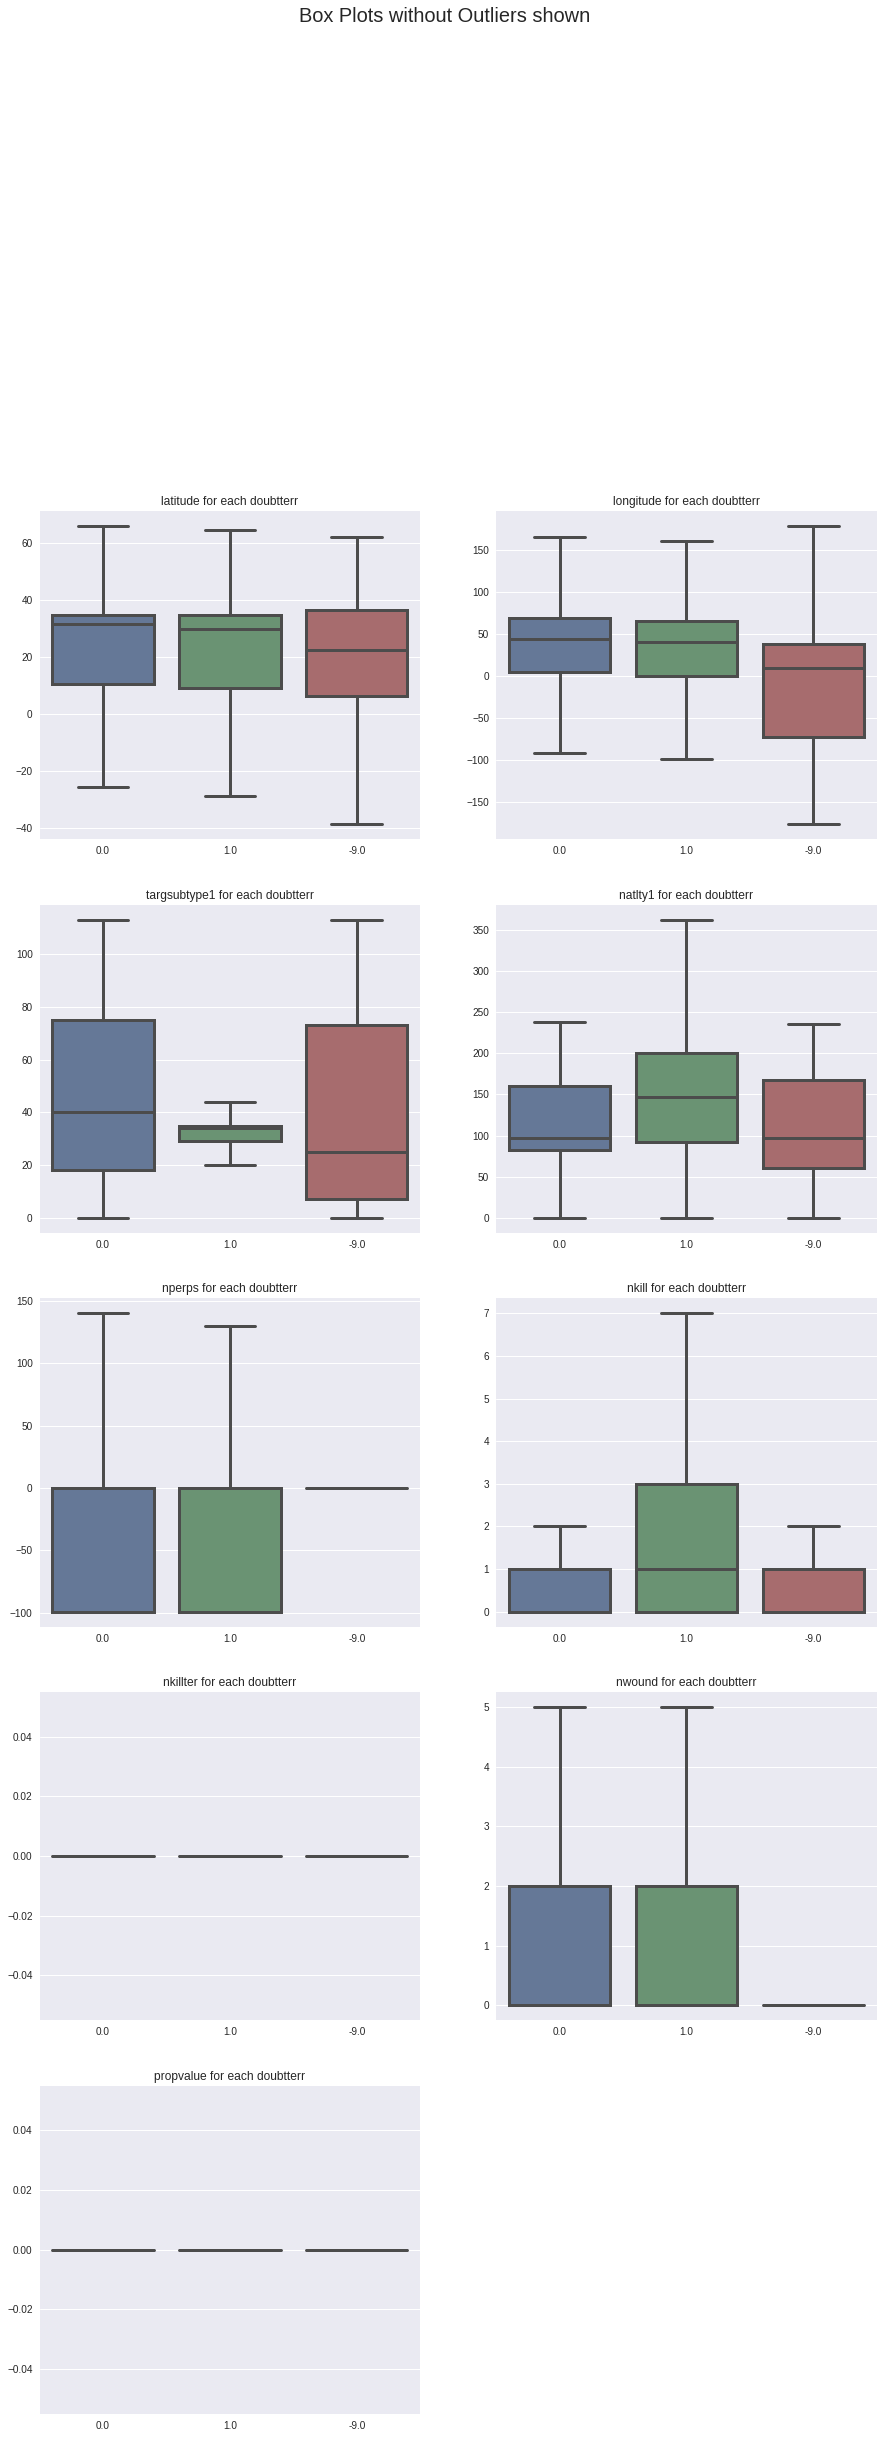

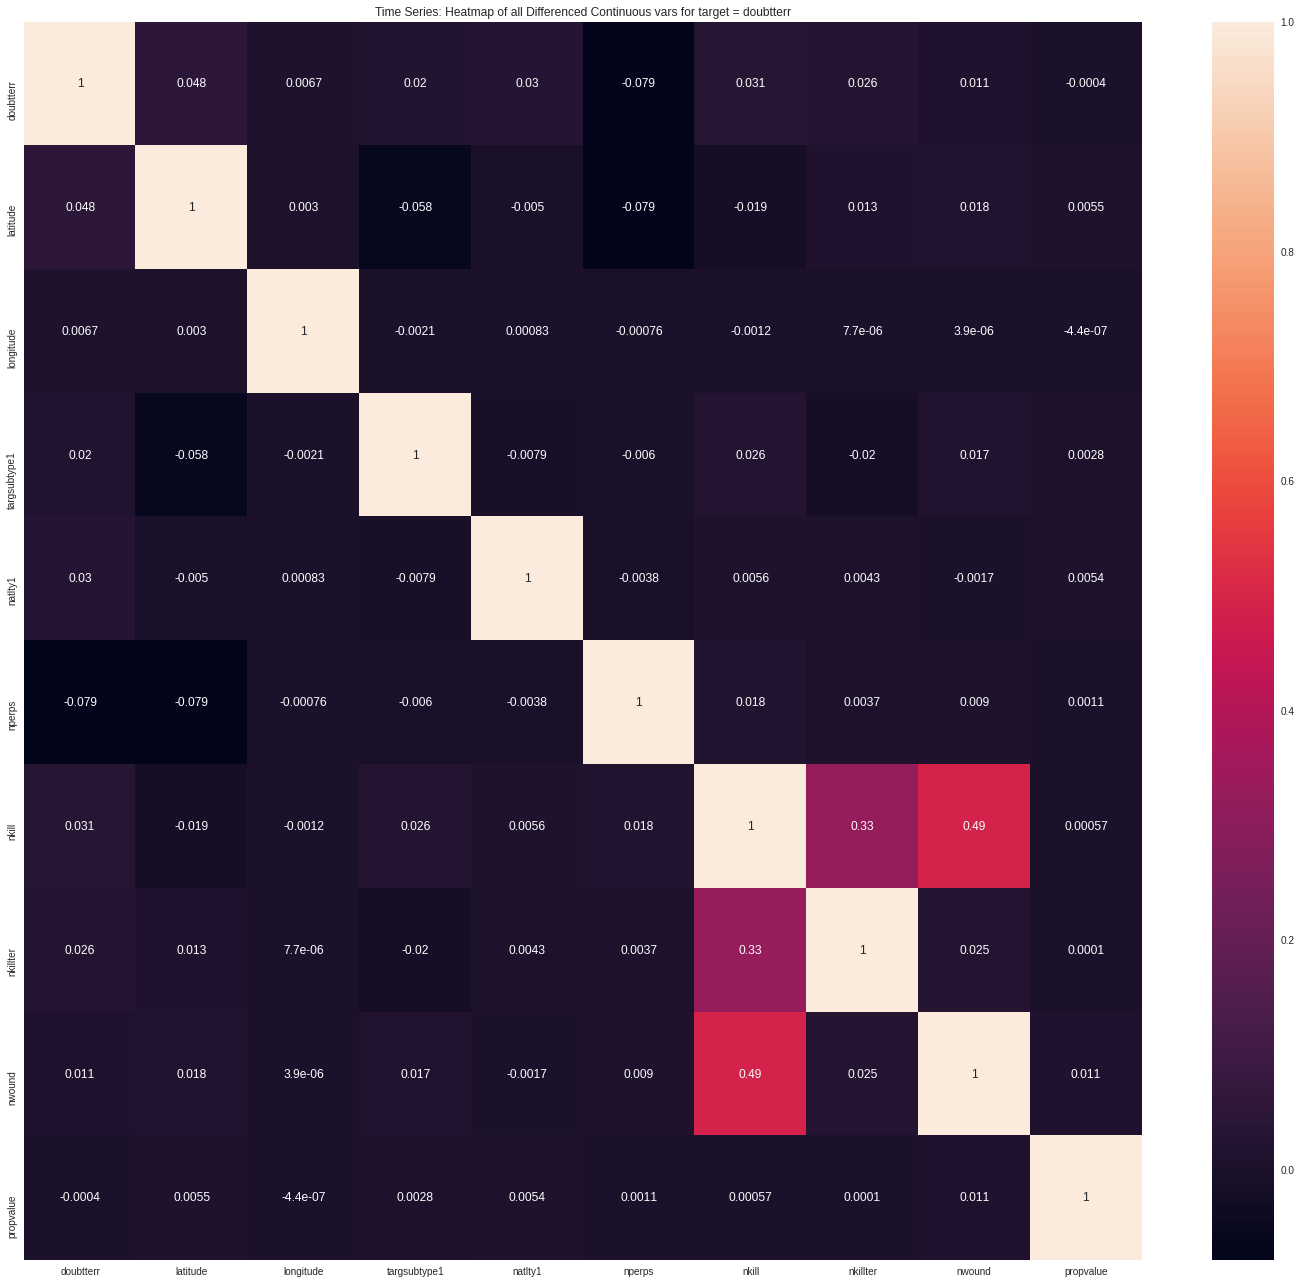

In [ ]:
df = AV.AutoViz('GLOBAL_TERRORISM.csv', depVar='doubtterr', verbose=2)

In [ ]:
import IPython
IPython.display.IFrame(filename='/content/SWEETVIZ_REPORT_BOOL.html', )

TypeError: ignored

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SWEETVIZ_REPORT_BOOL.html to SWEETVIZ_REPORT_BOOL (1).html
User uploaded file "SWEETVIZ_REPORT_BOOL.html" with length 3508507 bytes


In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

In [ ]:
df = AV.AutoViz('GLOBAL_TERRORISM.csv', depVar='doubtterr', verbose=2)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
%load_ext google.colab.data_table

In [ ]:
data.ind

AttributeError: ignored

In [ ]:
import time
import sys
from google.colab import output

print('Starting.')

with output.use_tags('some_outputs'):
  sys.stdout.write('working....\n')
  sys.stdout.flush();
  time.sleep(2)

  sys.stdout.write('still working...\n')
  sys.stdout.flush();
  time.sleep(2)

# Now clear the previous outputs.
output.clear(output_tags='some_outputs')
print('All done!')


In [ ]:
%unload_ext google.colab.data_table

In [ ]:
data.cars()

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))